## Practical 2: Reservoir Computing Networks 

### Madison E. Chester

In [1]:
import sys
import pickle
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reservoir Computing Networks: Theory, Mathematics, and Implementations

#### Introduction to Reservoir Computing Networks (RCNs)

Reservoir Computing Networks (RCNs) are a type of recurrent neural network (RNN) designed to process temporal or sequential data efficiently. They leverage a fixed, randomly initialized "reservoir" to transform the input into a high-dimensional space, followed by a trained linear readout layer to produce the output. This architecture simplifies training and addresses some of the challenges faced by traditional RNNs, such as vanishing or exploding gradients.

#### Theory Behind Reservoir Computing Networks

The primary concept behind RCNs is the separation of dynamic memory (handled by the reservoir) and the output generation (handled by the readout layer). The reservoir acts as a dynamic system that projects the input into a high-dimensional space, capturing temporal dependencies. This projection is then used by a simple linear readout layer to produce the final output.

##### Components of RCNs

1. **Input Layer**: This layer maps the input signal into the reservoir.
2. **Reservoir**: A fixed, recurrent network of neurons with randomly initialized weights. It acts as a high-dimensional dynamic system.
3. **Readout Layer**: A trainable linear layer that maps the reservoir states to the desired output.

#### Mathematical Formulation

1. **Input Transformation**:
   $$
   \mathbf{u}(n) = \mathbf{W}_{in} \mathbf{x}(n)
   $$
   where $\mathbf{x}(n)$ is the input at time $n$ and $\mathbf{W}_{in}$ is the input weight matrix.

2. **Reservoir Dynamics**:
   $$
   \mathbf{x}(n+1) = f(\mathbf{W}\mathbf{x}(n) + \mathbf{W}_{in}\mathbf{u}(n+1) + \mathbf{W}_{back}\mathbf{y}(n+1))
   $$
   where $\mathbf{W}_{in} \in \mathbb{R}^{N \times K}$ and $\mathbf{W}_{back} \in \mathbb{R}^{N \times L}$, and $f$ is a non-linear function.

3. **Output Generation**:
   $$
   \mathbf{y}(n+1) = g(\mathbf{W}_{out}\mathbf{x}(n+1))
   $$
   where $\mathbf{W}_{out}$ is the readout weight matrix, and $g$ is another non-linear function.

#### Implementations of RCNs

##### 1. Input Layer

The input layer maps the incoming data to the reservoir. This is typically a linear transformation.

##### 2. Reservoir

The reservoir is a fixed, recurrent network with randomly assigned weights. The key properties of the reservoir include:

- **Spectral Radius**: The largest absolute eigenvalue of the reservoir weight matrix $\mathbf{W}$. It determines the stability of the reservoir dynamics.
- **Sparsity**: Often, the reservoir weight matrix $\mathbf{W}$ is sparse, meaning that only a fraction of its elements are non-zero.

##### 3. Readout Layer

The readout layer is trained using supervised learning techniques. Typically, linear regression is used to determine the weights of the readout layer.

#### Training Procedure

1. **Initialization**: Randomly initialize the reservoir and input weights.
2. **Collect States**: Run the input data through the reservoir to collect the reservoir states.
3. **Train Readout**: Use the collected reservoir states and the corresponding output labels to train the readout layer.

#### Advantages of RCNs

- **Simplified Training**: Only the readout layer is trained, reducing computational complexity.
- **Rich Dynamics**: The reservoir can capture complex temporal patterns due to its high-dimensional representation.
- **Scalability**: RCNs can handle large, high-dimensional input data efficiently.

#### Applications of RCNs

RCNs are particularly useful in domains where temporal or sequential data is prevalent, such as:

- **Time Series Prediction**: Forecasting future values based on historical data.
- **Speech Recognition**: Processing audio signals to recognize spoken words or phrases.
- **Control Systems**: Managing dynamic systems that require real-time decision-making.

#### Conclusion

Reservoir Computing Networks offer a powerful and efficient approach to handling temporal data. By leveraging a fixed reservoir and training only a linear readout layer, RCNs simplify the training process while maintaining the ability to capture complex dynamics. Their versatility makes them suitable for a wide range of applications, from time series prediction to speech recognition and beyond.

In [2]:
import data as Data 
import network as NetworkModule 

### data.py

This file contains a Python class `Data` responsible for managing and preprocessing data for reservoir computing networks (RCNs). The class includes various methods for importing, filtering, and structuring data. Here's an overview of its key functionalities:

1. **Data Importing and Preprocessing**:
   - The `import_data` method loads data from a MATLAB file, rounding it to four decimal places.
   - Data is structured and reshaped for training and testing, with methods like `build_training_matrix` and `build_test_matrix`.
   - Data filtering can be applied to specific spectral bands using the `filter_data` method.

2. **Label Generation**:
   - Methods like `build_train_labels_lin` and `build_test_labels_lin` generate labels for linear regression tasks.
   - Similarly, methods like `build_train_labels_log` and `build_test_labels_log` generate labels for logistic regression tasks.

3. **Accuracy Calculation**:
   - The `accuracy_lin` method calculates accuracy for linear regression predictions.

4. **Problem-Specific Data Building**:
   - Additional methods like `leftvsright_mixed` build data specifically for certain classification problems.

### network.py

This file defines a Python class `Network` responsible for setting up and training reservoir computing networks (RCNs). Here's a summary of its functionalities:

1. **Network Setup**:
   - The `setup_network` method initializes the RCN's input and reservoir layers, setting up input connections (`W_in`) and adjacency matrix (`W`) with random weights.

2. **Trajectory Computation**:
   - The `compute_nodes_trajectories` method computes the dynamics of the reservoir, including the initial state and trajectories, both for training and testing.

3. **Training and Testing**:
   - The `train_network` method processes training data through the network and fits the result to a specified classifier (`'lin'` for linear regression, `'log'` for logistic regression, or `'1nn'` for 1-nearest neighbor).
   - The `test_network` method processes testing data through the trained network, computing trajectories and predictions.

4. **Helper Functions**:
   - The class includes additional helper functions for accuracy calculation and data processing.

#### Building and Training a Reservoir Computing Network for Classification

In this project, we construct and train a Reservoir Computing Network (RCN) for classifying data from various test scenarios. The steps include data preparation, network setup, and classification.

##### 1. Data Preparation

**Loading and Preprocessing the Data:**
We load data using the `Data` class, splitting it into training and testing sets (80/20 split). We apply bandpass filtering to isolate relevant spectral bands (e.g., theta, alpha, beta), enhancing signal quality.

##### 2. Network Setup

**Defining the Network Architecture:**
Using the `Network` class, we set up the RCN with parameters such as the number of nodes (`num_nodes`) and connection probabilities (`input_probability`, `reservoir_probability`). These hyperparameters significantly affect the network's learning and generalization capabilities.

**Initializing the Network:**
The `setup_network` method initializes input connections and the reservoir matrix, ensuring stability by keeping the largest eigenvalue less than one.

##### 3. Training and Classification

**Training the Network:**
The network is trained with the prepared data, fitting the regressor based on the specified classifier (linear regression, logistic regression, or 1-nearest neighbor).

**Testing the Network:**
The trained network is evaluated on test data, computing node trajectories and mean state values to assess accuracy in predicting test labels.

In [3]:
def setup_and_train_reservoir(test_name, filter_name, classifier, num_nodes, input_probability, reservoir_probability):
    """
    Function to set up and train a reservoir computing network (RCN) for a specified test scenario.

    Args:
        test_name (str): Name of the test scenario ('5s' for 5-state problem, 'lvr' for left vs. right problem).
        filter_name (str): Name of the spectral band for data filtering.
        classifier (str): Type of classifier ('lin' for linear regression, 'log' for logistic regression, '1nn' for 1-nearest neighbor).
        num_nodes (int): Number of nodes in the reservoir layer.
        input_probability (float): Probability of non-zero connections in the input layer.
        reservoir_probability (float): Probability of non-zero connections in the reservoir layer.

    Returns:
        float: Accuracy of the trained network on the test data.
    """

    # initialize data and network instances
    d = Data.Data(80)
    Network = NetworkModule.Network()

    # load and preprocess data based on the specified test scenario
    if test_name == '5s':
        d.import_data('dataSorted_allOrientations.mat')
        if classifier == 'lin':
            d.build_train_labels_lin()
            d.build_test_labels_lin()
        elif classifier == 'log':
            d.build_train_labels_log()
            d.build_test_labels_log()
        else:
            print("This classifier is not supported for this test.")
            sys.exit(1)
        d.build_training_matrix()
        d.build_test_matrix()
        Network.L = 5
    elif test_name == 'lvr':
        if classifier == 'log' or classifier == '1nn':
            d.import_data('dataSorted_leftAndRight.mat')
            d.leftvsright_mixed()
            Network.L = 1
        else: 
            print("This classifier is not supported for this test.")
            sys.exit(1)
    else:
        print("This test does not exist.")
        sys.exit(1)

    # filter the data based on the specified spectral band
    if filter_name not in d.spectral_bands.keys():
        print("The specified frequency band is not supported")
        sys.exit(1)
    d.training_data = d.filter_data(d.training_data, filter_name)
    d.test_data = d.filter_data(d.test_data, filter_name)

    # compute the absolute value of the data to remove negative numbers
    d.training_data = np.abs(d.training_data)
    d.test_data = np.abs(d.test_data)

    # define network parameters
    Network.T = d.training_data.shape[1]
    Network.n_min = 2540
    Network.K = 128
    Network.N = num_nodes
    Network.u = d.training_data
    Network.y_teach = d.training_results

    # setup and train the network
    Network.setup_network(d, num_nodes, input_probability, reservoir_probability, d.data.shape[-1])
    Network.train_network(d.data.shape[-1], classifier, d.num_columns, d.num_trials_train, d.train_labels, Network.N)

    # test the trained network
    Network.mean_test_matrix = np.zeros([Network.N, d.num_trials_test, d.data.shape[-1]])
    Network.test_network(d.test_data, d.num_columns, d.num_trials_test, Network.N, d.data.shape[-1], t_autonom=d.test_data.shape[1])

    # return accuracy of the trained network
    if classifier == 'lin': 
        return d.accuracy_lin(Network.regressor.predict(Network.mean_test_matrix.T), d.test_labels)
    elif classifier == 'log':
        return Network.regressor.score(Network.mean_test_matrix.T, d.test_labels.T)
    elif classifier == '1nn':
        return Network.regressor.score(Network.mean_test_matrix.T, d.test_labels)

The following code analyzes the relationship between the number of nodes in the reservoir layer and the model accuracy for a 5-state classification task.

- **Parameters Setup:**
    - `num_nodes = np.arange(10, 105, 5)`: Defines a range of node counts from 10 to 100 in increments of 5.

- **Iteration and Accuracy Calculation:**
    - Iterates over each number of nodes in the range.
    - Calls `setup_and_train_reservoir` to train the RCN with fixed input and reservoir probabilities, calculating accuracy each time.

- **Plotting:**
    - Plots accuracy against the number of nodes.

This analysis visually demonstrates how varying the number of nodes affects the RCN's accuracy, offering insights into the trade-off between model complexity and performance.

Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)


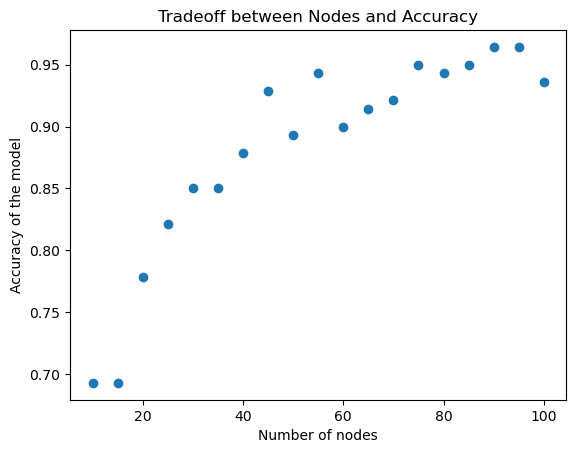

In [4]:
# array of node counts from 10 to 100 in steps of 5
num_nodes = np.arange(10, 105, 5)  

# empty list to store accuracy values
acc = []

# iterate over each number of nodes
for n in num_nodes:
    # train RCN and calculate accuracy for current number of nodes
    acc.append(setup_and_train_reservoir('5s', 'lowmultiunit', 'lin', n, 0.5, 0.2))

# plot accuracy against number of nodes
plt.plot(num_nodes, acc, 'o')
plt.xlabel('Number of nodes')  
plt.ylabel('Accuracy of the model')  
plt.title('Tradeoff between Nodes and Accuracy')  
plt.show()  

**Parameter Grid Search for Reservoir Computing Network** 

1. **Define Parameter Grid**: We specify a grid of parameters, including `num_nodes`, `input_probability`, and `reservoir_probability`.

2. **Initialize Results DataFrame**: A DataFrame called `results` is created to store the accuracy of the RCN for each parameter combination.

3. **Iterate Through Combinations**: We iterate through all parameter combinations, training the RCN and storing the accuracy in `results`.

4. **Analyze Parameter Variance**: Variance of accuracy for each parameter is calculated to understand its impact on RCN performance.

5. **Sort Dimensions by Variance**: Parameters are sorted based on variance, indicating their influence on RCN accuracy.

This analysis helps identify influential parameters for RCN performance optimization.

In [5]:
# define the grid
grid = {
    'num_nodes': np.arange(10,110,20),
    'input_probability': np.arange(0.1,0.3,0.05),
    'reservoir_probability': np.arange(0.2,1.2,0.2)
}

In [6]:
# initialize a dataframe to store results
results = pd.DataFrame(columns=['num_nodes','input_probability','reservoir_probability','acc'])

# iterate through each combination of parameter values
i = 0
for value in itertools.product(*grid.values()):
    # calculate accuracy for the current parameter combination
    acc = setup_and_train_reservoir('5s','lowmultiunit','lin',value[0],value[1],value[2])
    
    # store the results in the dataframe
    results.loc[i] = [value[0], value[1], value[2], acc]
    i += 1

Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 140, 5)
Total of (128, 508, 

In [13]:
print(results)

    num_nodes  input_probability  reservoir_probability       acc
0        10.0               0.10                    0.2  0.607143
1        10.0               0.10                    0.4  0.657143
2        10.0               0.10                    0.6  0.678571
3        10.0               0.10                    0.8  0.742857
4        10.0               0.10                    1.0  0.714286
..        ...                ...                    ...       ...
95       90.0               0.25                    0.2  0.942857
96       90.0               0.25                    0.4  0.935714
97       90.0               0.25                    0.6  0.942857
98       90.0               0.25                    0.8  0.957143
99       90.0               0.25                    1.0  0.928571

[100 rows x 4 columns]


This code calculates the variance of accuracy for each parameter dimension while keeping others constant. 

1. **Initialization**: It initializes an empty dictionary `variances` to store the variance of accuracy for each parameter dimension.

2. **Calculating Variances**: It iterates over each parameter in the `grid` dictionary and calculates the variance of accuracy for each value of that parameter while holding others constant. It stores these variances in the `variances` dictionary.

3. **Sorting**: It then sorts the variances for each parameter dimension in descending order.

4. **Printing**: Finally, it prints the sorted dimensions along with their corresponding variances.

This process provides insights into how changes in each parameter individually affect the variance of accuracy in the model, helping to identify which parameters have the most significant impact on model performance.

In [23]:
# calculate the variance of accuracy for each dimension while holding others constant
variances = {}
for param, values in grid.items():
    variances[param] = {}
    for value in values:
        acc_values = results[(results[param] == value)]['acc']
        variances[param][value] = acc_values.var()

# sort the dimensions based on variance
sorted_dimensions = {}
for param, variance_dict in variances.items():
    sorted_dimensions[param] = sorted(variance_dict.items(), key=lambda x: x[1], reverse=True)

# print the sorted dimensions
for param, sorted_variances in sorted_dimensions.items():
    print(f"{param}: {sorted_variances}")

num_nodes: [(10, 0.0021836734693877545), (30, 0.00041608485499462924), (50, 0.0003237110633727178), (70, 0.00026248657357679953), (90, 0.0001948174006444686)]
input_probability: [(0.15000000000000002, 0.011893197278911563), (0.1, 0.011275000000000002), (0.20000000000000004, 0.011062925170068029), (0.25000000000000006, 0.009810034013605447)]
reservoir_probability: [(0.2, 0.012621374865735772), (1.0, 0.011474087003222343), (0.8, 0.011243823845327605), (0.4, 0.01093058539205156), (0.6000000000000001, 0.009253490870032223)]


These results show the variance of accuracy for different values of three parameters: `num_nodes`, `input_probability`, and `reservoir_probability`. Lower values of variance indicate more stable and consistent accuracy across different parameter settings.

From the provided data:

- **num_nodes**: The variance of accuracy decreases as the number of nodes in the reservoir layer increases. Specifically, the lowest variance is observed when `num_nodes` is 90, indicating that a higher number of nodes leads to more stable accuracy. This verifies what we saw in the previous graph. 

- **input_probability**: Here, the variance of accuracy is lowest when `input_probability` is 0.25. This suggests that a higher probability of non-zero connections in the input layer results in more consistent accuracy.

- **reservoir_probability**: The lowest variance in accuracy is observed when `reservoir_probability` is 0.6. This indicates that a moderate probability of non-zero connections in the reservoir layer contributes to more stable accuracy.

In summary, based on these results, the parameter settings associated with the lowest variance in accuracy are:
- `num_nodes`: 90
- `input_probability`: 0.25
- `reservoir_probability`: 0.6

This code generates line plots to visualize the relationship between different parameter values (`num_nodes`, `input_probability`, and `reservoir_probability`) and the variance of accuracy obtained from a computational experiment. Before plotting, the parameter values are sorted in ascending order to ensure proper visualization. Each line plot represents one parameter dimension, showing how the variance of accuracy changes with different values of that parameter. The x-axis represents the parameter values, while the y-axis represents the variance of accuracy. These plots help us understand how changes in each parameter affect the stability of accuracy in the model.

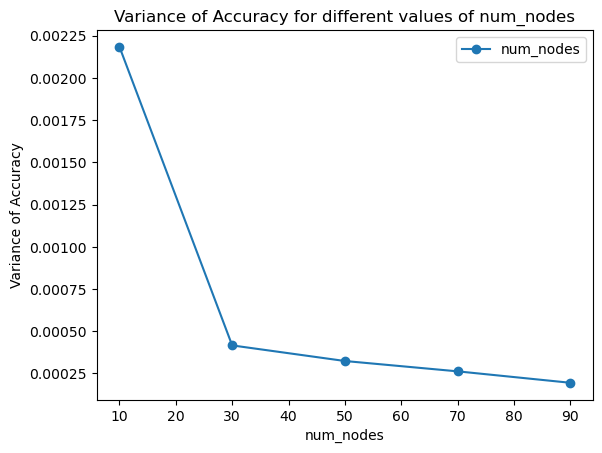

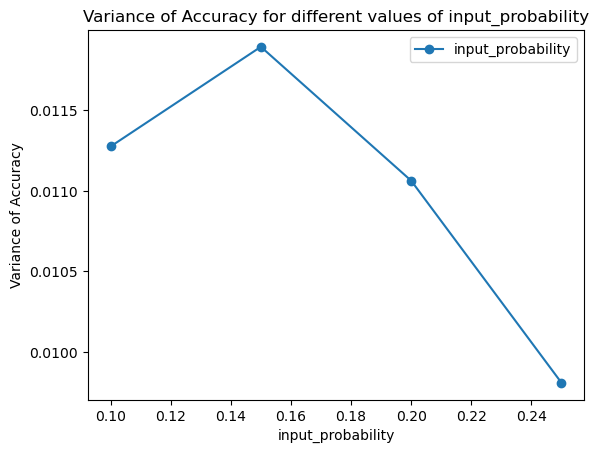

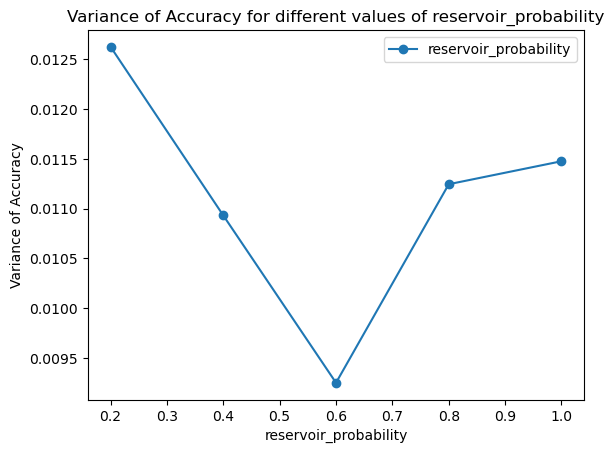

In [25]:
# sort the input_probability and reservoir_probability lists in ascending order
sorted_dimensions['input_probability'] = sorted(sorted_dimensions['input_probability'])
sorted_dimensions['reservoir_probability'] = sorted(sorted_dimensions['reservoir_probability'])

import matplotlib.pyplot as plt

# Iterate through each parameter dimension
for param, sorted_variances in sorted_dimensions.items():
    # Extract parameter values and corresponding variances
    values, variances = zip(*sorted_variances)
    
    # Create a line plot
    plt.plot(values, variances, marker='o', label=param)
    
    # Add labels and title
    plt.xlabel(param)
    plt.ylabel('Variance of Accuracy')
    plt.title(f'Variance of Accuracy for different values of {param}')
    
    # Show legend
    plt.legend()
    
    # Show plot
    plt.show()


This code defines a function `find_max_acc_by_group` that takes a dataframe and a column name as input. It then finds the rows with the maximum accuracy for each unique group in the specified column and returns them. 

After defining the function, it is applied to find the rows with maximum accuracy for each value of `num_nodes`, `input_probability`, and `reservoir_probability` in the dataframe `results`. 

Finally, it prints the results for maximum accuracy for each variable, separated by the variable name.

In [41]:
# define a function to find the rows with maximum accuracy for each group in a dataframe
def find_max_acc_by_group(df, group_col):
    return df.loc[df.groupby(group_col)['acc'].idxmax()]

# find the rows with maximum accuracy for each value
max_acc_by_num_nodes = find_max_acc_by_group(results, 'num_nodes')
max_acc_by_input_prob = find_max_acc_by_group(results, 'input_probability')
max_acc_by_reservoir_prob = find_max_acc_by_group(results, 'reservoir_probability')

# print the results for maximum accuracy
print("Maximum accuracy for num_nodes:")
print(max_acc_by_num_nodes)
print("\nMaximum accuracy for input_probability:")
print(max_acc_by_input_prob)
print("\nMaximum accuracy for reservoir_probability:")
print(max_acc_by_reservoir_prob)

Maximum accuracy for num_nodes:
    num_nodes  input_probability  reservoir_probability       acc
7        10.0               0.15                    0.6  0.764286
39       30.0               0.25                    1.0  0.885714
40       50.0               0.10                    0.2  0.942857
61       70.0               0.10                    0.4  0.957143
91       90.0               0.20                    0.4  0.971429

Maximum accuracy for input_probability:
    num_nodes  input_probability  reservoir_probability       acc
82       90.0               0.10                    0.6  0.964286
85       90.0               0.15                    0.2  0.964286
91       90.0               0.20                    0.4  0.971429
75       70.0               0.25                    0.2  0.957143

Maximum accuracy for reservoir_probability:
    num_nodes  input_probability  reservoir_probability       acc
85       90.0               0.15                    0.2  0.964286
91       90.0           

This output shows the maximum accuracy achieved for different values of `num_nodes`, `input_probability`, and `reservoir_probability`. 

These results help identify the parameter combinations that result in the highest accuracy for the given dataset and model.

Upon examining the results, it becomes evident that the number of nodes (num_nodes) plays a paramount role in determining the model's accuracy. Specifically, the maximum value of 90 for num_nodes consistently yields the highest accuracy across various configurations, underscoring its critical significance in optimizing the model's performance. Furthermore, the minimal variance observed in accuracy when num_nodes is set to higher values suggests a robust stability in the model's performance, reinforcing the pivotal impact of this parameter.

While num_nodes emerges as the most influential variable, both input_prob and reservoir_prob exhibit greater variability in their effects on the model's accuracy. This variability implies a higher sensitivity to these parameters' values, albeit to a lesser extent compared to num_nodes. Nonetheless, it is noteworthy that input_prob shows comparatively less fluctuation in achieving maximum accuracy, indicating its importance as the second most impactful variable after num_nodes.

The analysis also reveals that the overall variance in accuracy across all input variables is relatively small, suggesting a consistent performance of the model under different configurations. As such, the focus should primarily be on maximizing accuracy, further emphasizing the critical role of num_nodes in optimizing the model's performance.

In summary, the findings underscore the pivotal significance of num_nodes in shaping the model's accuracy and stability, followed by input_prob as the second most impactful variable. These insights provide valuable guidance for fine-tuning the model parameters to achieve optimal classification performance in our dataset.